<a href="https://colab.research.google.com/github/zalish-shawon/py_notebooks/blob/main/test_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.DataFrame({
    'h': [150, 160, 170, 185, 190],
    'w': [50, 58, 70, 80, 90]
})
df

,h,w
0,150,50
1,160,58
2,170,70
3,185,80
4,190,90


In [10]:
m = df.mean()
s = df.std()

print("Mean values:\n", m)
print("\nStandard Deviation:\n", s)

Mean values:
 h    171.0
w     69.6
dtype: float64

Standard Deviation:
 h    16.733201
w    16.149303
dtype: float64


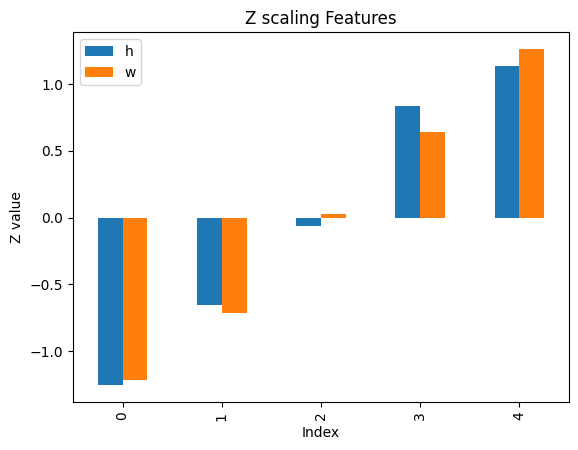

In [12]:
z = (df - m) / s
z.round(2)
z.plot(kind='bar')
plt.title("Z scaling Features")
plt.xlabel("Index")
plt.ylabel("Z value")
plt.show()


### Min and max scalling

In [14]:
df = pd.DataFrame({
    'h': [150, 175, 170, 180, 190],
    'w': [50, 60, 70, 180, 90]
})
df

,h,w
0,150,50
1,175,60
2,170,70
3,180,180
4,190,90


In [15]:
mn = df.min()
mx = df.max()
rg = mx - mn

mn, mx, rg

(h    150
 w     50
 dtype: int64,
 h    190
 w    180
 dtype: int64,
 h     40
 w    130
 dtype: int64)

In [16]:
ss = df - mn
ss.head()

,h,w
0,0,0
1,25,10
2,20,20
3,30,130
4,40,40


In [17]:
mm = ss / rg
mm.round(2)

,h,w
0,0.00,0.00
1,0.62,0.08
2,0.50,0.15
3,0.75,1.00
4,1.00,0.31


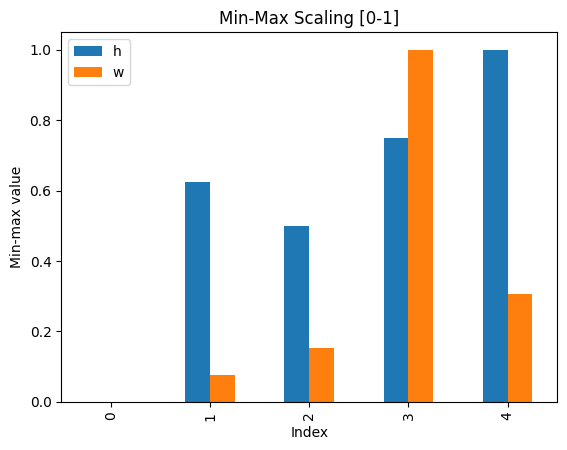

In [18]:
mm.plot(kind='bar')
plt.title("Min-Max Scaling [0-1]")
plt.xlabel("Index")
plt.ylabel("Min-max value")
plt.show()

### Robust Scaling Python Implementation

In [20]:
df = pd.DataFrame({
    'h': [150, 160, 170, 180, 300],
    'w': [50, 60, 70, 80, 200]
})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [25]:
md = df.median()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

md, q1, q3, iqr

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64)

In [26]:
ct = df - md
ct

,h,w
0,-20.0,-20.0
1,-10.0,-10.0
2,0.0,0.0
3,10.0,10.0
4,130.0,130.0


In [27]:
rb = ct / iqr
rb.round(2)

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


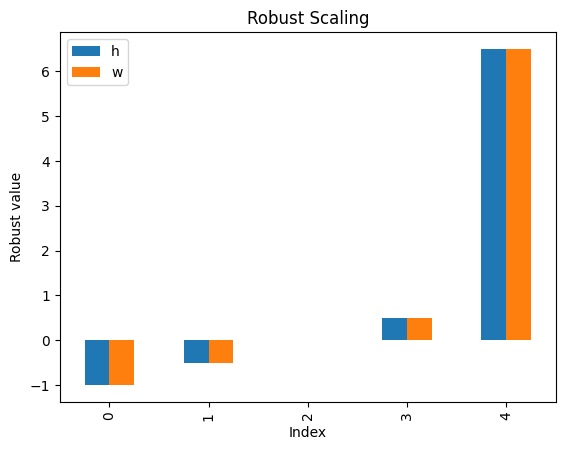

In [28]:
rb.plot(kind='bar')
plt.title("Robust Scaling")
plt.xlabel("Index")
plt.ylabel("Robust value")
plt.show()

### One Hot Encoding

In [30]:
import pandas as pd

df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})

df

,id,color,size,price
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,15
3,4,red,Medium,11


In [32]:
d_color = pd.get_dummies(df["color"], prefix="C", dtype=int)
d_color

,C_blue,C_green,C_red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1


In [34]:
df_encoded = pd.concat([df, d_color], axis=1)
df_encoded

,id,color,size,price,C_blue,C_green,C_red
0,1,red,Small,10,0,0,1
1,2,blue,Medium,12,1,0,0
2,3,green,Large,15,0,1,0
3,4,red,Medium,11,0,0,1


### Ordinal Encoding

In [36]:
df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})
df

,id,color,size,price
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,15
3,4,red,Medium,11


In [37]:
order = {"Small":1,"Medium":2,"Large":3}

In [38]:
df["size"] = df["size"].map(order).astype(int)
df

,id,color,size,price
0,1,red,1,10
1,2,blue,2,12
2,3,green,3,15
3,4,red,2,11
